# Retrieve a Snow Depth Spiral
During the SnowEx campaigns a TON of manual snow depths were collected, surveys for hackweek showed an overhelming interest in the manual 
snow depths dataset. This tutorial shows how easy it is to get at that data in the database


**Goal**: Visualize a small subset of snow depths 
**Approach**: 

1. Connect to the DB
2. Build a query using ORM filtering by dataset and date
3. Convert to a GeoDataFrame and plot


## Process
### Step 1: Get connected

In [1]:
# Import the function to get connect to the db
from snowexsql.db import get_db

# Import our class for the points table
from snowexsql.data import PointData

# Import a useful function for plotting and saving querys!
from snowexsql.conversions import points_to_geopandas

# Import some tools to build dates 
from datetime import date

In [2]:
# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@172.16.1.242/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

### Step 2: Build a query using ORM 

In [3]:
# Pick a dataset
dataset = 'depth'

# Pick a date
collection_date = date(2020, 2, 7)

# The part inside the query function is what we want back, in this case all columns for the point data
q = session.query(PointData)

# We then want to filter by the selected the data type depth.
q = q.filter(PointData.type == 'depth')

# Filter by a date
q = q.filter(PointData.date == collection_date)

results = q.all()

# how many did we retrieve?
print(f'{len(results)} records returned!')

250 records returned!


### Step 3: Convert the data to Geopandas Dataframe and plot it!

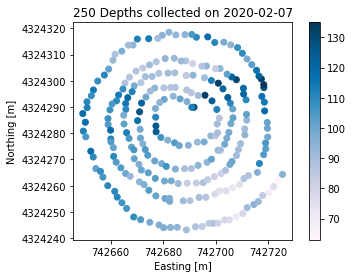

In [4]:
# Convert the records received to geopandas
df = points_to_geopandas(results)

# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = df.plot(column='value', legend=True, cmap='PuBu')

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax.set_title(f'{len(results)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')

# Close the session to avoid hanging transactions
session.close()